# EDA

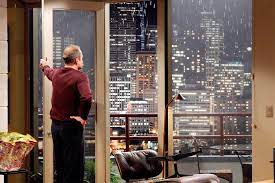

Stakeholder: Jennifer Montgomery (buyer):

- High budget,
- wants to show off
- timing within a month?
- waterfront,
- renovated, 
- high grades,
- resell within 1 year?


Research questions:
- Does renovation affect the sales price? 
- What is the impact of having waterfront? 
- What is the best time of the year to sell a property?

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Importing the data

In [2]:
# Importing the csv file as a dataframe, import date in a date time format
df_kch = pd.read_csv('data/eda.csv', parse_dates=['date'])

### First glimpse at the dataset

In [3]:
# Get some info about the dataset
df_kch.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,...,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,...,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,...,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000


In [4]:
df_kch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [5]:
df_kch.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140


## Data Cleanup

I got a first glimpse on the dataframe, now let's move on to **data cleanup**.
1. Columns:
- check for spaces in names
- check for odd names

Everything looks good here. Move on to the data.

2. Data:
- check for duplicates
- check the type of data, adjust if necessary
- check for missing values
- check if data could not be rounded

In [6]:
# check if there are duplicates
df_kch.duplicated().value_counts()
# no duplicates found

False    21597
Name: count, dtype: int64

In [7]:
# check the type of data - floats and integers, data as date time - everything OK.
# check for missing values

### Missing data

Check for missing data, see what (and if anything at all) has to be done with it.

In [8]:
# import missingno
import missingno as msno

In [9]:
# display number of missing values per column
df_kch.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

Quite some missing values in columns: waterfront, view, sqft_basement, yr_renovated.

Next, explore unique values in columns with missing values.

In [10]:
# waterfront: 
#df_kch['waterfront'].unique()

# view
#df_kch['view'].unique()

#sqft_basement
#df_kch['sqft_basement'].unique()

#yr_renovated
df_kch['yr_renovated'].unique()


array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

There is no need to really get rid of the data with Nan values at this point.

## Visualisation
### Overall price distribution
Explore the general trends in sales price distribution over the entire dataset.



In [11]:
# Set themes for all plots
#theme for the plots
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(rc=custom_params, style="ticks") # for pastel colors, use palette="pastel

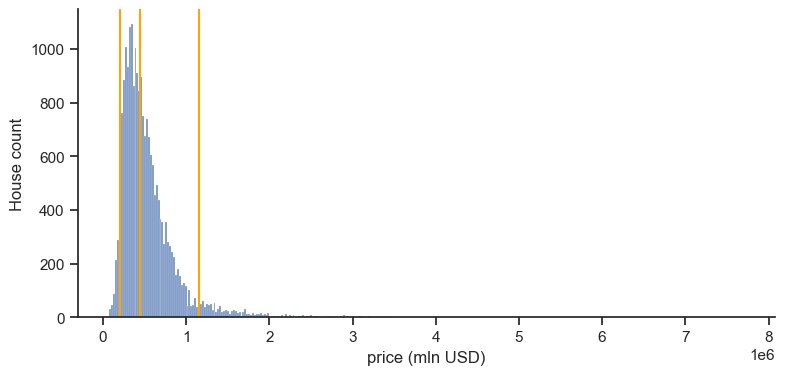

In [12]:
# Plot a histogram to see overall distribution of prices
#plt.xlim(0, 4000000)
plt.figure(figsize=(9, 4))
percentiles = [5, 50, 95] # define the percentiles you would like to be shown on the plot
sns.histplot(data=df_kch, x=df_kch.price) # plot the data , log_scale=True for log scale
for q in np.percentile(df_kch.price, percentiles): #for loop with numpy.percentile function
    plt.axvline(q, color='orange') # draws a percentile line on your histogram
plt.xlabel('price (mln USD)')
plt.ylabel('House count')
#plt.xlim(0, 4000000)
plt.show()

The distribution shows right skew; there are very few properties with prices over 2 mln USD. Try plotting a boxplot to visualize the outliers.

<Axes: xlabel='price'>

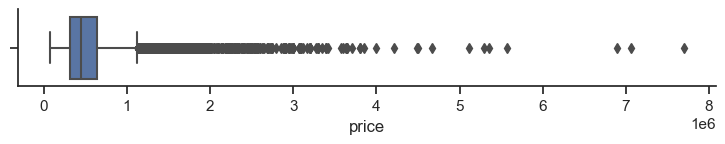

In [13]:
# boxplot for all prices
plt.figure(figsize=(9, 1))
sns.boxplot(data=df_kch, x=df_kch.price) 



### Research question 1: Does renovation affect the sales price?

**Hypothesis: Renovation increases the sales price of a house.**

- Compare renovated vs non-renovated houses (regardlesss of the date)

In [14]:
# To compare renovated vs non-renovated houses, one has to first get rid of NA values:
df_kch_R = df_kch.copy()
df_kch_R['yr_renovated'].unique()  

# drop the nas from yr_renovated column
df_kch_R.dropna(subset=['yr_renovated'], inplace=True)
df_kch_R['yr_renovated'].unique()
df_kch_R.shape # 21597 rows (==sales) (originally), 17749 rows (==sales) after dropping NAs from yr_renovated column

# create a column with info whether house was renovated or not
df_kch_R.eval('was_renovated = yr_renovated != 0', inplace=True)
df_kch_R.head()

# replace True/False with "renovated" and "non-renovated"
df_kch_R['was_renovated'] = df_kch_R.was_renovated.replace({True: 'renovated', False: 'non-renovated'})
df_kch_R['was_renovated'] = df_kch_R.was_renovated.astype('string')
df_kch_R['was_renovated'].value_counts()
# non-renovated    17005, 
# renovated          744

was_renovated
non-renovated    17005
renovated          744
Name: count, dtype: Int64

Text(0.5, 1.0, 'Renovation impact on the price of King County houses')

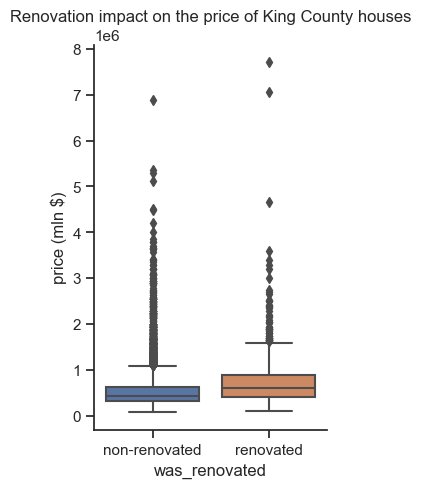

In [15]:
# boxplot: prices of renovated vs non-renovated houses (overall)
plt.figure(figsize=(3, 5))
sns.boxplot(data=df_kch_R, x=df_kch_R.was_renovated, y=df_kch_R.price)
plt.ylabel('price (mln $)')
plt.title('Renovation impact on the price of King County houses')

This boxplot is not very informative, and it does not take into account when houses were built. 

See if any meaningful insights come out if one plots price vs year buit, grouped by whether a house was renovated or not. Normalize the data to show price/sqft, to correct for different house sizes in the two groups. Show average prices for each year.

Disclaimer: two datasets (renovated vs non-renovated) are vastly different in size (17005 non-renovated houses vs 744 renovated houses), and there might potentially be other factors influencing price difference between these two groups.

In [16]:
# before plotting, add a column that shows average price per sqft (living area)
df_kch_R.eval('price_per_sqft = price / sqft_living', inplace=True)
df_kch_R.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,was_renovated,price_per_sqft
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,non-renovated,188.051
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,renovated,209.339
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,non-renovated,308.163
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,non-renovated,303.571
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000,non-renovated,226.937


Text(0.5, 0, 'Built year')

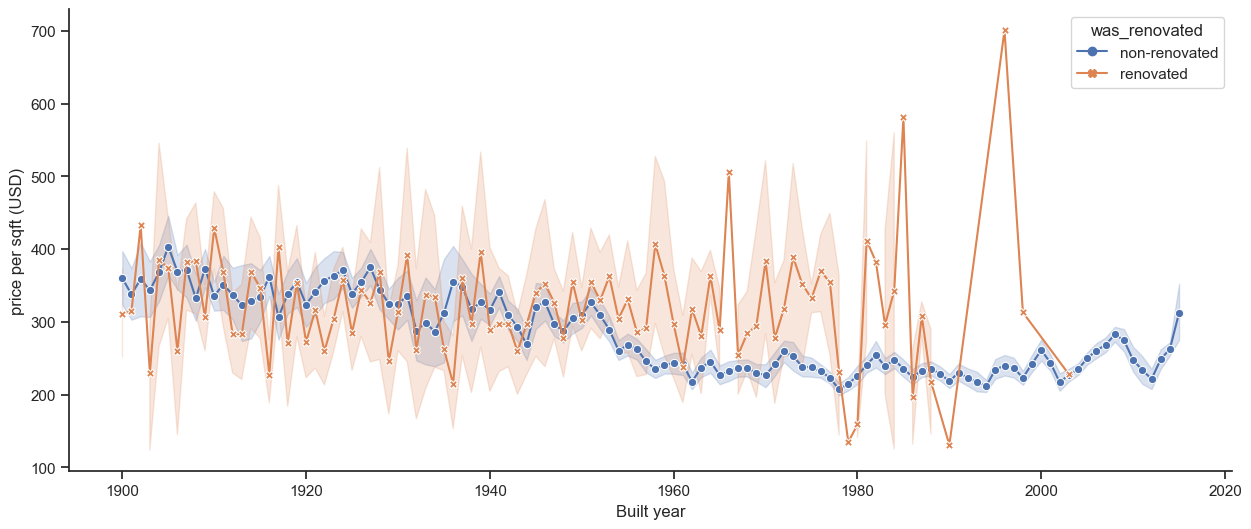

In [17]:
# line plot of price vs year_built, grouped by renovation status (hue=was_renovated).
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_kch_R, x=df_kch_R.yr_built, #filtered dataset (NAs dropped from the renovation column)
                y=df_kch_R.price_per_sqft, 
                hue=df_kch_R.was_renovated, 
                style=df_kch_R.was_renovated, 
                markers=True, 
                dashes=False) # legend=False
#plt.title('Renovation impact on the price of King County houses built in a given year')
plt.ylabel('price per sqft (USD)')
plt.xlabel('Built year')
#plt.legend(loc='upper right', labels=['non-renovated', 'renovated'])

# non-renovated    17005, 
# renovated          744


### Research question 2: What is the impact of having a waterfront?
**Hypothesis: Houses with waterfront tend to be located outside the city limits.**

**Hypothesis: There are clusters of expensive houses with waterfront.**

To explore these hypotheses, I will plot the location coordinates of the houses with a waterfront on the King County shapefile (link!!) using geopandas library.

In [18]:
# import packages needed for plotting points on the map
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

<Axes: >

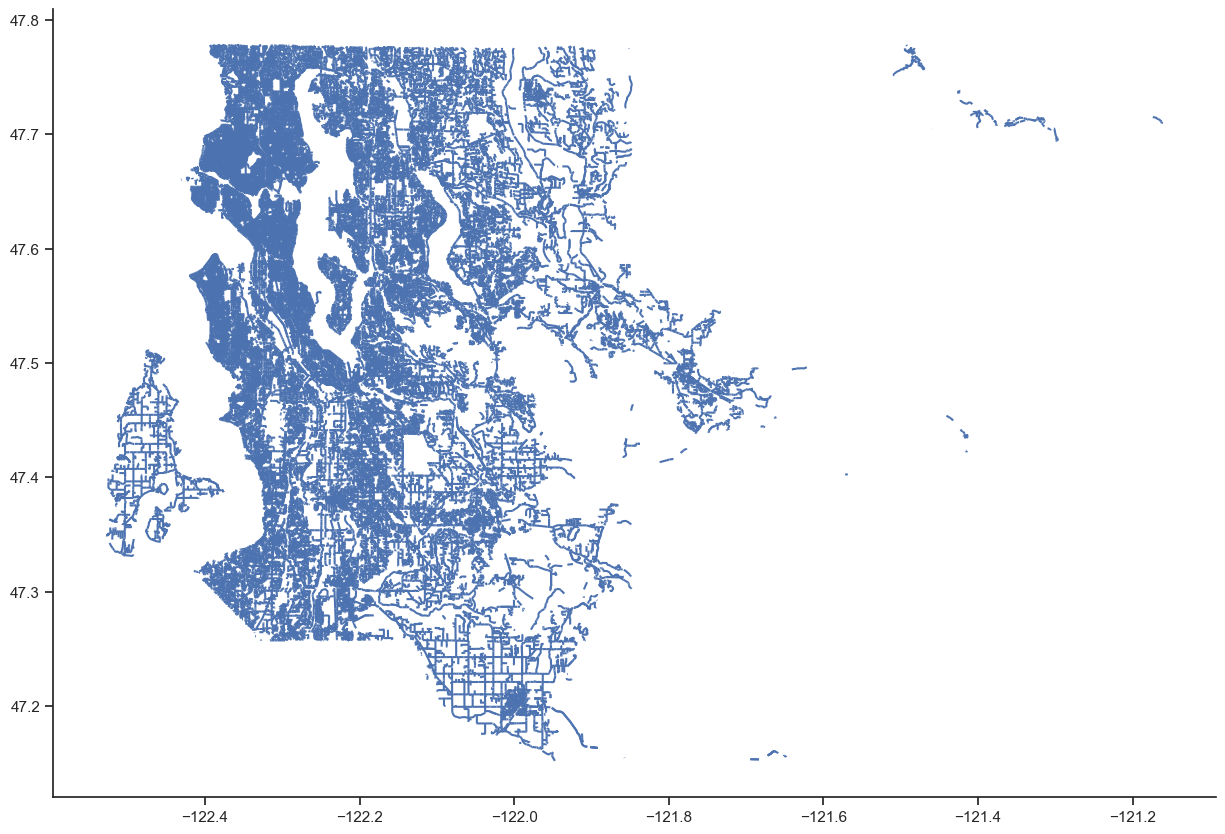

In [19]:
# Importing the shapefile of the King County
# zipped folder with the shapefile and accessory files can be downloaded here: 
# https://www2.census.gov/geo/tiger/TIGER2022/ADDRFEAT/
# Copy the entire uzipped folder to the data folder, not only the shapefile (.shp) file!
king_county = gpd.read_file('data/tl_2022_53033_addrfeat/tl_2022_53033_addrfeat.shp')

fig, ax = plt.subplots(figsize=(15,15))
king_county.plot(ax=ax)

In [20]:
# specify parameter crs: coordinate reference system
crs = {'init':'epsg:4326'}

# create points based on latitude and longtitude
geometry = [Point(xy) for xy in zip(df_kch['long'], df_kch['lat'])]

# use created points to create a GeoDataFrame
geo_df = gpd.GeoDataFrame(df_kch, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,geometry
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,POINT (-122.25700 47.51120)
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,POINT (-122.31900 47.72100)
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,POINT (-122.23300 47.73790)
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,POINT (-122.39300 47.52080)
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,POINT (-122.04500 47.61680)


id               146
bedrooms         146
bathrooms        146
sqft_living      146
sqft_lot         146
floors           146
waterfront       146
view             145
condition        146
grade            146
sqft_above       146
sqft_basement    142
yr_built         146
yr_renovated     121
zipcode          146
lat              146
long             146
sqft_living15    146
sqft_lot15       146
date             146
price            146
geometry         146
dtype: int64

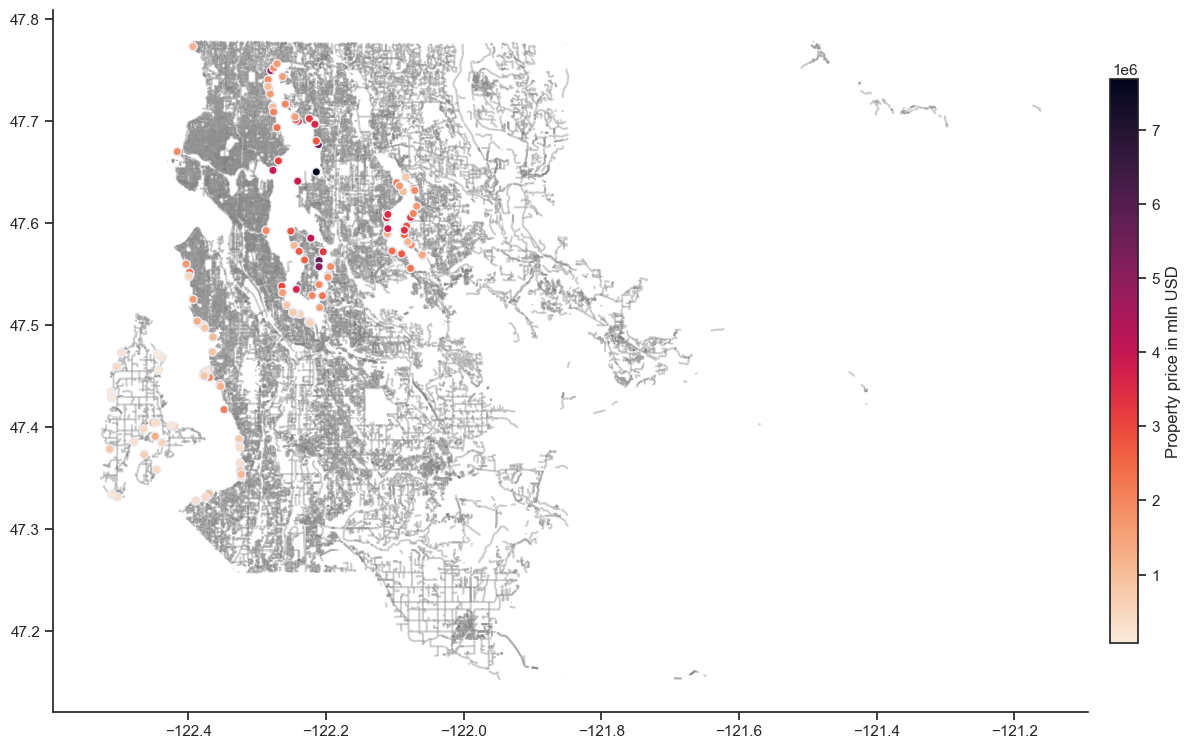

In [21]:
# Finally, plotting points on the map
fig, ax = plt.subplots(figsize=(14,14))
king_county.plot(ax=ax, alpha=0.4, color='grey', zorder =1) # z-axis order - 1 is the first on the bottom, 2 is lying on it.

# plot only the houses having a waterfront
geo_df[geo_df['waterfront'] == 1].plot(column='price', ax=ax,   legend=False, cmap='rocket_r', edgecolor='#EAEAF2', zorder = 2)

norm = plt.Normalize(geo_df.price.min(),geo_df.price.max()) 
# normalizes the values of your dataset to make use of the full extent of the colorbar

sm = plt.cm.ScalarMappable(cmap='rocket_r',norm=norm) 
# create a standalone colorbar object that can be individually adjusted 
#(see also:https://matplotlib.org/stable/users/explain/colors/colorbar_only.html)

cbar = plt.colorbar(sm, fraction = 0.026, pad=0.02) 
# adjust the parameters fraction and pad to set the size of the colorbar according to your needs

cbar.ax.set_ylabel('Property price in mln USD') 
# set visible colorbar description
#plt.title('Location of King County houses with a waterfront')

geo_df[geo_df['waterfront'] == 1].count() #count houses with a waterfront

Now plot the same data, but only for renovated houses with a waterfront:

In [22]:
# copy the original dataframe, fill NAs in yr_renovated column with 0 - this will be needed to filter out all zeros.
df_kch_renov = df_kch.copy()
df_kch_renov = df_kch_renov.fillna({'yr_renovated': 0})
df_kch_renov['yr_renovated'].unique()
df_kch_renov.shape

(21597, 21)

In [23]:
# specify parameter crs: coordinate reference system
crs = {'init':'epsg:4326'}

# create points based on latitude and longtitude
geometry2 = [Point(xy) for xy in zip(df_kch_renov['long'], df_kch_renov['lat'])]

# use created points to create a GeoDataFrame
geo_df_renov = gpd.GeoDataFrame(df_kch_renov, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry2) #specify the geometry list we created
geo_df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,geometry
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,POINT (-122.25700 47.51120)
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,POINT (-122.31900 47.72100)
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,POINT (-122.23300 47.73790)
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,POINT (-122.39300 47.52080)
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,POINT (-122.04500 47.61680)


id               29
bedrooms         29
bathrooms        29
sqft_living      29
sqft_lot         29
floors           29
waterfront       29
view             29
condition        29
grade            29
sqft_above       29
sqft_basement    27
yr_built         29
yr_renovated     29
zipcode          29
lat              29
long             29
sqft_living15    29
sqft_lot15       29
date             29
price            29
geometry         29
dtype: int64

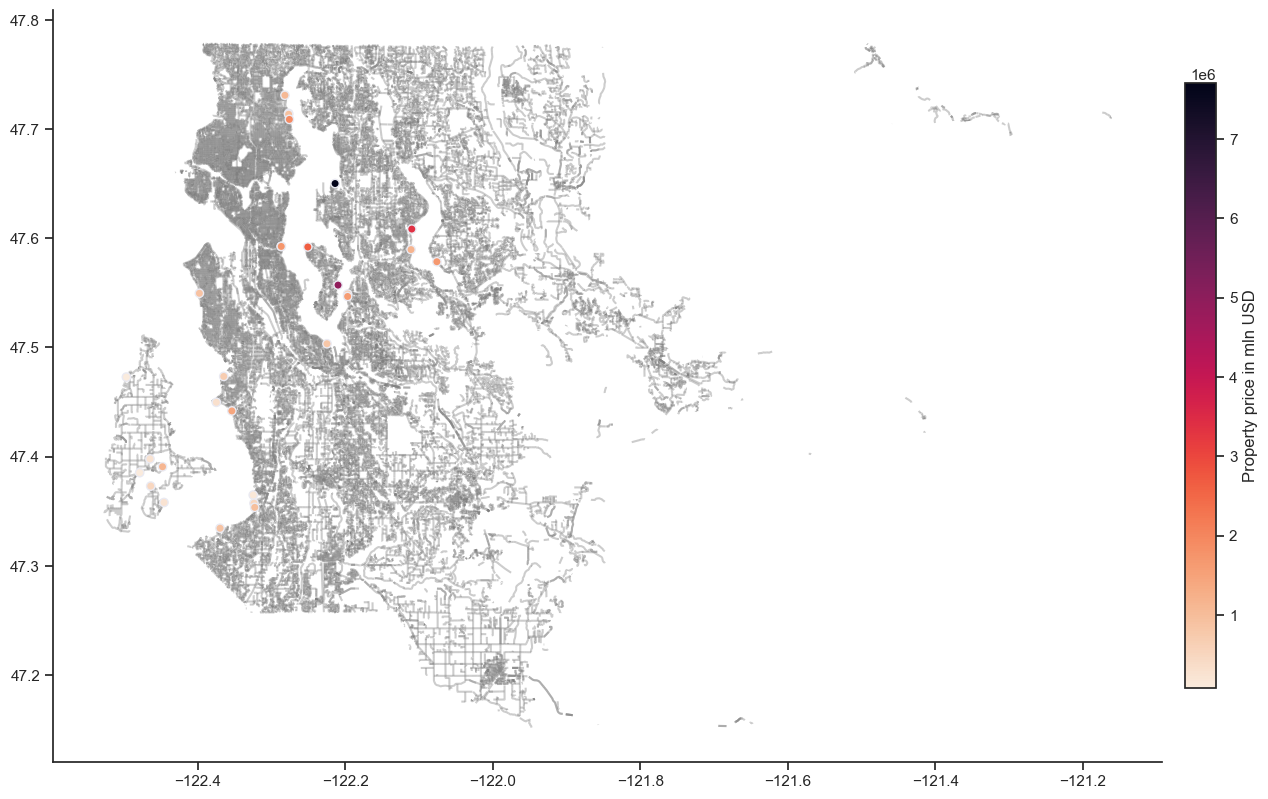

In [24]:
# Plot the location of renovated houses with a waterfront:

fig, ax = plt.subplots(figsize=(15,15))
king_county.plot(ax=ax, alpha=0.4, color='grey', zorder =1)
geo_df_renov[(geo_df_renov['waterfront'] == 1) & (geo_df_renov['yr_renovated'] != 0)].plot(column='price', ax=ax,   legend=False, cmap='rocket_r', edgecolor='#EAEAF2', zorder = 2)


norm2 = plt.Normalize(geo_df_renov.price.min(),geo_df_renov.price.max()) 
# normalizes the values of your dataset to make use of the full extent of the colorbar

sm = plt.cm.ScalarMappable(cmap='rocket_r',norm=norm2) 
# create a standalone colorbar object that can be individually adjusted 
#(see also:https://matplotlib.org/stable/users/explain/colors/colorbar_only.html)

cbar = plt.colorbar(sm, fraction = 0.026, pad=0.02) 
# adjust the parameters fraction and pad to set the size of the colorbar according to your needs

cbar.ax.set_ylabel('Property price in mln USD') 
# set visible colorbar description
#plt.title('Location of King County houses with a waterfront')

geo_df_renov[(geo_df_renov['waterfront'] == 1) & (geo_df_renov['yr_renovated'] != 0)].count()

Apart from Geopandas, I found a library `folium` that allows for creating interactive maps:

In [25]:
import folium

waterfront_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')
                        
for i in df_kch.index: # adding coordinates of the waterfront houses to the interactive open street map using folium package
    lat = df_kch.lat[i]
    long = df_kch.long[i]
    if df_kch.waterfront[i] == 1: 
        marker = folium.Marker([lat, long]).add_to(waterfront_map)
    
waterfront_map

### Research question 3: What is the best time of the year to sell a property?

**Hypothesis: Summertime is characterized by high house sales prices**

Calculate average sales per month, plot them e.g as line or bar plot, see if any months stand out?


Text(0.5, 0, 'Sale date')

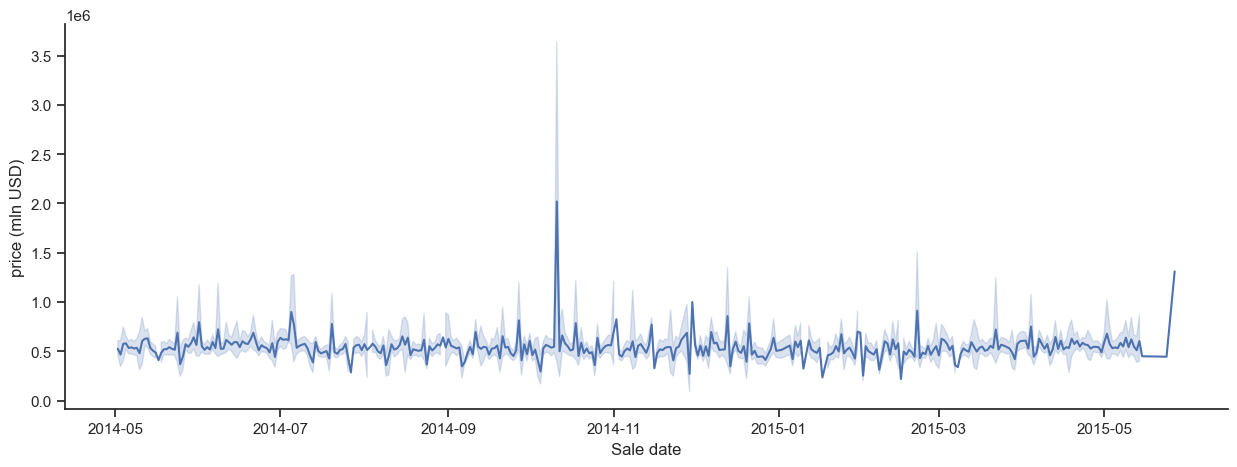

In [26]:
# price vs date plot 
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_kch, x=df_kch.date, y=df_kch.price) # seaborn lineplot aggregates data and shows mean + 95% confidence interval
#plt.title('Changes of sale prices between May 2014 and May 2015')
plt.ylabel('price (mln USD)')
plt.xlabel('Sale date')
#plt.xlim(0, 6000000) # shows mean price per year with 95% confidence interval

# create a new column with a year and month, group by and calc average price, plot monthly average prices per

It would be nice to directly be able to read out values from the plot - for that, plot the data using plotly package that produces interactive plots.

In [31]:
# make the above plot interactive using plotly
# Seattle weather - scatter plot of precipitation vs. wind using Plotly
import plotly.express as px


weather_plot = px.line(x=df_kch['date'].sort_values(), y=df_kch['price'], 
           labels={'x': 'Sale date', 'y': 'price (mln USD)'}, 
           title='Changes of sales prices between May 2014 and May 2015')

# Show the plot
weather_plot.show()

### Extra: Which parameters influence price the most?
Which parameters should Jennifer Montgomery focus on to show off the most?

Check correlation of selected variables with sale price:
- plot a heatmap for these
- plot selected variables as a function of sales price

In [28]:
# Check correlation of other variables with price
df_kch.corr()['price'].sort_values()


zipcode         -0.053
id              -0.017
date            -0.004
long             0.022
condition        0.036
yr_built         0.054
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.129
floors           0.257
waterfront       0.276
lat              0.307
bedrooms         0.309
sqft_basement    0.325
view             0.396
bathrooms        0.526
sqft_living15    0.585
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

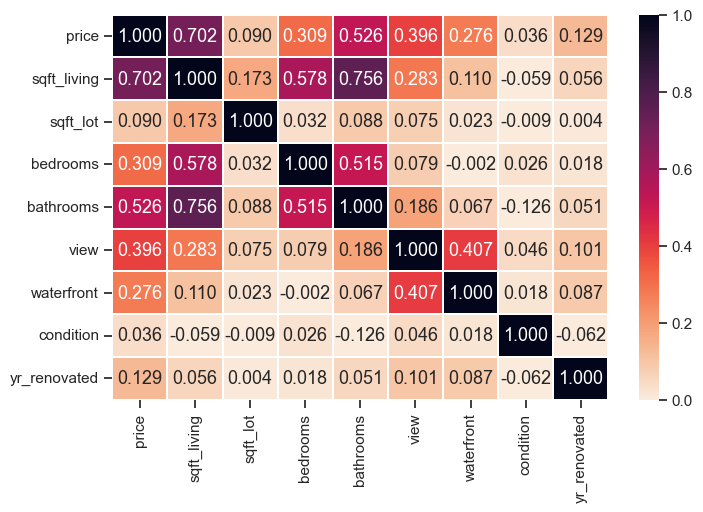

In [29]:
# heatmap with interesting features
feature_columns = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'view', 'waterfront', 'condition', 'yr_renovated']
features = df_kch[feature_columns]

ax = plt.axes()
corrMatrix = features.corr()
#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, annot=True , fmt=".3f", vmin=0, cmap=sns.cm.rocket_r,annot_kws={"size": 13},  linewidths=.1,)
#ax.set_title('Correlation matrix of selected parameters',fontsize=16)
plt.show()


Text(0.5, 0, 'grade')

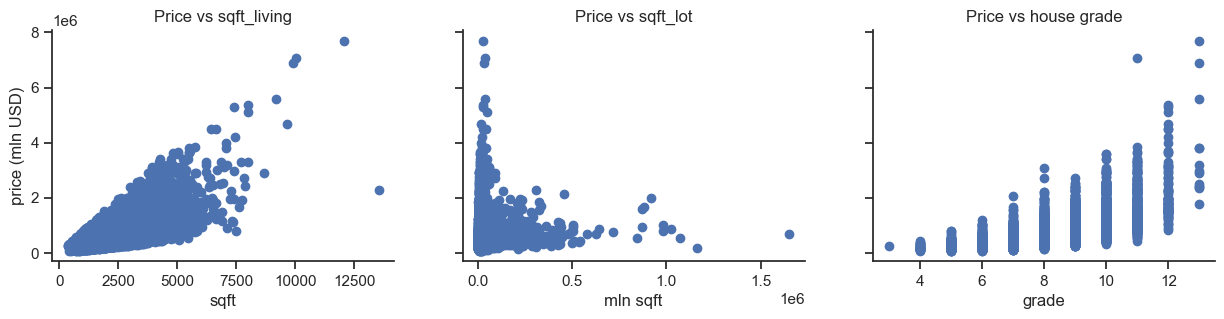

In [30]:
# visualize correlation of price with other parameters important for the buyer:

important_features = [df_kch['sqft_living'], df_kch['sqft_lot'], df_kch['grade']]

#sns.regplot(df_kch['sqft_above'], df_kch['price'])
#plt.title("Regression Plot")
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(df_kch['sqft_living'],df_kch['price'])
ax1.set_title('Price vs sqft_living')
ax1.set_ylabel('price (mln USD)')
ax1.set_xlabel('sqft')
ax2.scatter(df_kch['sqft_lot'],df_kch['price'])
ax2.set_title('Price vs sqft_lot')
ax2.set_xlabel('mln sqft')
ax3.scatter(df_kch['grade'],df_kch['price'])
ax3.set_title('Price vs house grade')
ax3.set_xlabel('grade')
#ax4.scatter(df_kch['condition'],df_kch['price'])
#ax4.set_title('Price vs house condition')

That's it!